<a href="https://colab.research.google.com/github/prathameshPatil1606/prathamesh/blob/main/diabetesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project:- Diabetes Pridiction

 **Import Required Libraries**

This cell imports necessary Python libraries:

numpy and pandas: For numerical operations and data manipulation.

matplotlib.pyplot and seaborn: For data visualization.

sklearn: Contains machine learning tools including model selection, preprocessing, training, and evaluation.

imblearn: Provides SMOTE for handling imbalanced datasets.

joblib: For saving and loading trained models.



In [ ]:
#  Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

**Load the Dataset**

Loads the diabetes dataset from a CSV file into a Pandas DataFrame, allowing structured data manipulation and analysis.

In [ ]:

# Load the Dataset
df = pd.read_csv('diabetes.csv')
print("First 5 rows:\n", df.head())

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Data Cleaning - Replace 0s with NaN**

Zeros in medical features like Glucose or BMI are not physiologically possible. This step replaces zeros with NaNs to treat them as missing values.



In [ ]:

# Data Cleaning - Replace 0s with NaN in columns where 0 is not valid
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)


**Fill Missing Values with Median**

 Missing values are replaced with median values to maintain the central tendency while minimizing the effect of outliers.



In [ ]:

# Fill missing values with median
df.fillna(df.median(), inplace=True)


**Explore the Dataset**

Shows dataset size and class distribution.

Visualizes imbalance between diabetic (1) and non-diabetic (0) classes, which is essential for deciding resampling techniques.




Dataset Shape: (768, 9)

Class distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


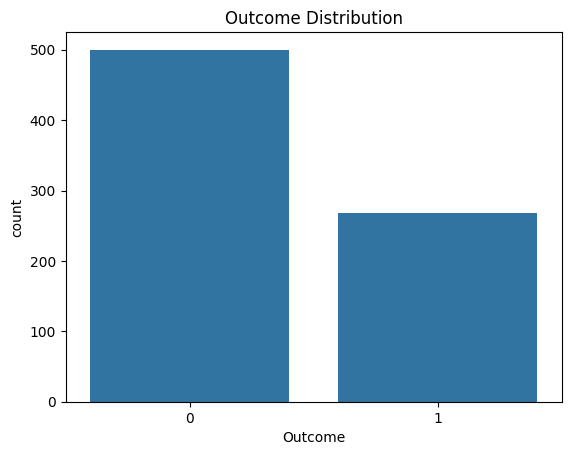

In [ ]:
# Explore the dataset
print("\nDataset Shape:", df.shape)
print("\nClass distribution:\n", df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()


**Statistical Summary**

Provides summary statistics (mean, std, min, max, etc.) of each feature to understand data distribution and detect anomalies.



In [ ]:

# Statistical Summary
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

**Feature Selection**

Separates input features (X) and target label (Y). This is needed for training machine learning models.



In [ ]:

# Feature Selection
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']
print("\nFeatures used:", list(X.columns))



Features used: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


 **Scaling**

 Standardizes features by removing the mean and scaling to unit variance. This improves model performance, especially for distance-based algorithms.



In [ ]:

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-Test Split**

Splits data into training and testing sets to evaluate the model on unseen data. Stratified split ensures equal class proportions.

In [ ]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)


**Handle Imbalance with SMOTE**

SMOTE generates synthetic examples of the minority class to balance the dataset. This helps prevent model bias toward the majority class.

In [ ]:
# Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)
print("After SMOTE:", pd.Series(Y_train_sm).value_counts())


After SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


**Grid Search for Best Parameters**

Grid Search systematically searches combinations of hyperparameters to find the best-performing configuration using cross-validation.



In [ ]:

# Grid Search for Best Parameters
params = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_sm, Y_train_sm)

best_rf = grid.best_estimator_
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 150}


**Evaluate the Model**

Predicts outcomes on training and testing data. Compares accuracy to detect overfitting or underfitting.

In [ ]:
# Evaluate the Model
train_preds = best_rf.predict(X_train_sm)
test_preds = best_rf.predict(X_test)

print("Training Accuracy:", accuracy_score(Y_train_sm, train_preds))
print("Test Accuracy:", accuracy_score(Y_test, test_preds))


Training Accuracy: 0.9525
Test Accuracy: 0.7207792207792207


**Confusion Matrix**

Confusion matrix visualizes true vs. predicted labels, helping evaluate how well the model classifies each class.



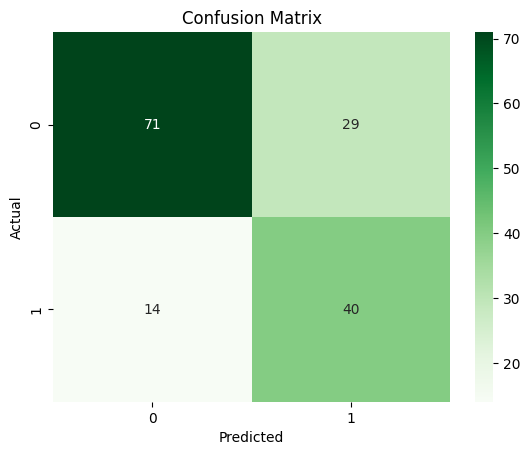

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Classification Report**

Provides precision, recall, F1-score, and support for each class — crucial metrics for imbalanced classification.



In [ ]:

# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, test_preds))



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       100
           1       0.58      0.74      0.65        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



**ROC-AUC Curve**

ROC curve shows trade-off between sensitivity and specificity. AUC quantifies model's ability to distinguish classes — higher is better.



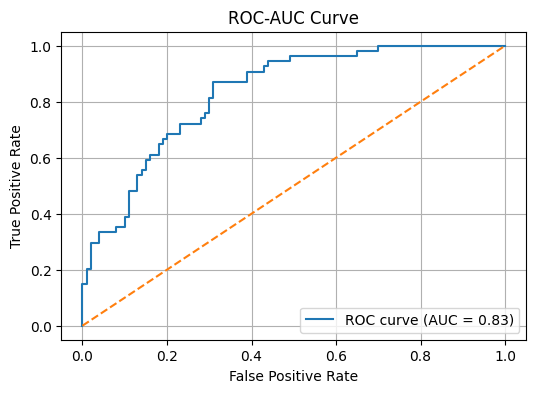

In [ ]:

# ROC-AUC Curve
probs = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, probs)
roc_auc = roc_auc_score(Y_test, probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.grid()
plt.show()

**Feature Importance**

Random Forest provides feature importance scores, which show which input features were most influential in prediction.

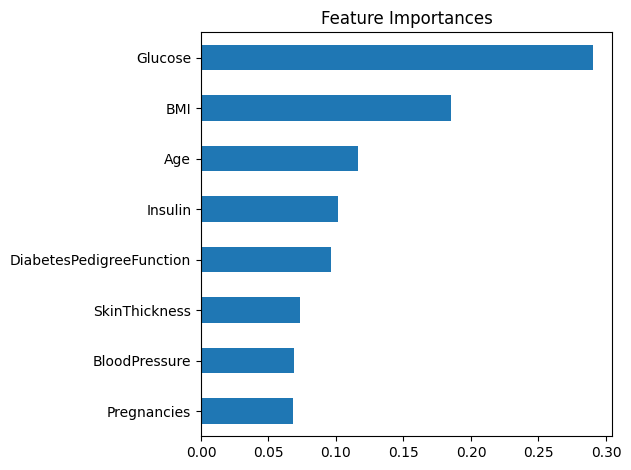

In [ ]:

# Feature Importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()


**Save Model and Scaler**

Persists the trained model and scaler so they can be reused later for predictions without retraining.

In [ ]:
# Save Model and Scaler
joblib.dump(best_rf, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved.")


Model and scaler saved.


 **Predict for New Patient**

 Takes new patient data, scales it using the saved scaler, and predicts diabetes status using the saved model — simulating real-world deployment.



In [ ]:
# Predict for New Patient
import numpy as np
import joblib
import pandas as pd # Import pandas

input_data = (3,158,76,36,245,31.6,0.851,28)
input_array = np.asarray(input_data).reshape(1, -1)


# Load scaler and model (just to simulate real deployment)
loaded_scaler = joblib.load('scaler.pkl')
loaded_model = joblib.load('diabetes_model.pkl')

# Get feature names from the original data used to fit the scaler
# Assuming the original data used to fit the scaler had the same column names as df
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert input_array to a DataFrame with feature names
input_df = pd.DataFrame(input_array, columns=feature_names)

# Transform and predict using the DataFrame
input_scaled = loaded_scaler.transform(input_df)
prediction = loaded_model.predict(input_scaled)

if prediction[0] == 1:
    print("\nThe person is diabetic")
else:
    print("\nThe person is not diabetic")


The person is diabetic
